<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_1_ML_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

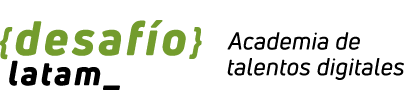

<center><h1> <font color='green'>Regresión lineal con Python</font></h1></center>

1. Importamos las librerías necesarias.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Librerías de machine learning
from sklearn.datasets import load_diabetes ## para el dataset
from sklearn import linear_model ## modelo
from sklearn.model_selection import train_test_split # separo mi data en entranmiento y test
from sklearn.metrics import mean_squared_error, r2_score #metricas de evaluación

2. Cargamos los datos de prueba. Utilizamos el dataset **diabetes** para obtener datos de esta enfermedad. Vamos a obtener por separado las características ('diabetes_X') y las etiquetas ('diabetes_y'). Notemos que **diabetes_X** es una lista de listas, con 10 valores cada una.

In [19]:
type(load_diabetes)

function

In [17]:
df = pd.DataFrame(load_diabetes)
df

ValueError: DataFrame constructor not properly called!

In [8]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

In [22]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [24]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [23]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

3. Aplicamos los pasos descritos.

  a) **División:** dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. **diabetes_X** son las características, **diabetes_y** son las etiquetas, **test_size=0.3** indica que el 30% de los datos se utilizará para el conjunto de prueba, y **random_state=123** se utiliza para establecer una semilla aleatoria para la reproducibilidad de la división.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.3, random_state=123)

In [27]:
len(diabetes_X)

442

In [26]:
len(X_train), len(y_train)

(309, 309)

> b) **Creación y entrenamiento:** creamos una instancia del objeto de regresión lineal (regr) utilizando **linear_model.LinearRegression()**. Luego, entrenamos el modelo utilizando los datos de entrenamiento llamando al método **fit()** del objeto **regr**


In [28]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

> c) **Predicción:** Realizamos la predicción utilizando los datos de prueba ('X_test') llamando al método **predict** del objeto **regr**. Imprimiremos, a partir de esto, los coeficientes del modelo ('regr.coef_')

In [29]:
y_pred = regr.predict(X_test)
print('Coeficientes: \n', regr.coef_)

Coeficientes: 
 [  10.45319644 -261.16273528  538.85049356  280.72085805 -855.24407564
  472.1969838   166.53481397  309.88981052  684.06085168  102.3789942 ]


In [30]:
resultado = pd.DataFrame()

resultado['y_test'] = y_test
resultado['y_pred'] = y_pred
resultado

,y_test,y_pred
0,185.0,160.552073
1,150.0,155.908662
2,246.0,228.859818
3,184.0,168.363066
4,110.0,156.163279
...,...,...
128,138.0,72.501061
129,273.0,254.531607
130,158.0,97.901290
131,168.0,156.500640




> d) **Evaluación:** Evaluamos el modelo calculando el error cuadrado medio



In [31]:
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))


 Error cuadrado medio: 2926.82


In [39]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.4, random_state=123)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))


 Error cuadrado medio: 3035.35


In [37]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.2, random_state=123)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))


 Error cuadrado medio: 2724.26


In [38]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.1, random_state=123)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))


 Error cuadrado medio: 2390.34


In [36]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_test, y_pred))


 Error cuadrado medio: 3542.09


In [42]:
## NO HACERLO NUNCA


X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size= 0.1, random_state=123)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
print('\n Error cuadrado medio: %.2f' % mean_squared_error(y_train, y_pred))

resultado = pd.DataFrame()
resultado['y_train'] = y_train
resultado['y_pred'] = y_pred
resultado ## SOLO PASA CON LAS REGRESIÓN LINEAL, PORQUE ES UN MODELO DETERMINISTA


 Error cuadrado medio: 2921.82


,y_train,y_pred
0,296.0,217.836245
1,55.0,77.253448
2,75.0,75.927493
3,53.0,99.380677
4,173.0,213.626305
...,...,...
392,220.0,163.189047
393,92.0,123.006473
394,242.0,275.776518
395,132.0,238.372384


In [ ]:
###tips para el desafio

data.dtypes
data.isna().sum()
data.describe()
data.info()

pd.get_dummies(data, drop_first=True).astype('int')


y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

## comprar resultados

